In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, RationalQuadratic, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [5]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [7]:
orig_inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913]])

In [9]:
orig_outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837])

In [11]:
# Add the new data points
new_data = np.array([[0.821135, 0.631793, 0.21912 ], [0.160962, 0.337418, 0.258974], [0.45, 0.55, 0.66667], [0.964659, 0.5, 0.99],
                    [0.171525, 0.343916, 0.248737]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(15, 20)

In [13]:
inputs

array([[0.17152521, 0.34391687, 0.2487372 ],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ],
       [0.160962  , 0.337418  , 0.258974  ],
       [0.45      , 0.55      , 0.66667   ],
       [0.964659  , 0.5       , 0.99      ],
       [0.171525  , 0.343916  , 0.248737  ]])

In [15]:
outputs = np.append(orig_outputs, -0.11475021790975153)
outputs = np.append(outputs, -0.12193845259123104)
outputs = np.append(outputs, -0.09929718270706538)
outputs = np.append(outputs, -0.38876318751915895)
outputs = np.append(outputs, -0.12056950205696235)
len(outputs)

20

In [17]:
orig_outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837])

In [19]:
outputs

array([-0.1121222 , -0.08796286, -0.11141465, -0.03483531, -0.04800758,
       -0.11062091, -0.39892551, -0.11386851, -0.13146061, -0.09418956,
       -0.04694741, -0.10596504, -0.11804826, -0.03637783, -0.05675837,
       -0.11475022, -0.12193845, -0.09929718, -0.38876319, -0.1205695 ])

In [21]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

,feature1,feature2,feature3,target
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


In [23]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,target
0,0.171525,0.343917,0.248737,-0.112122
1,0.242114,0.644074,0.272433,-0.087963
2,0.534906,0.398501,0.173389,-0.111415
3,0.492581,0.611593,0.340176,-0.034835
4,0.134622,0.219917,0.458206,-0.048008
5,0.345523,0.941360,0.269363,-0.110621
6,0.151837,0.439991,0.990882,-0.398926
7,0.645503,0.397143,0.919771,-0.113869
8,0.746912,0.284196,0.226300,-0.131461
9,0.170477,0.697032,0.149169,-0.094190


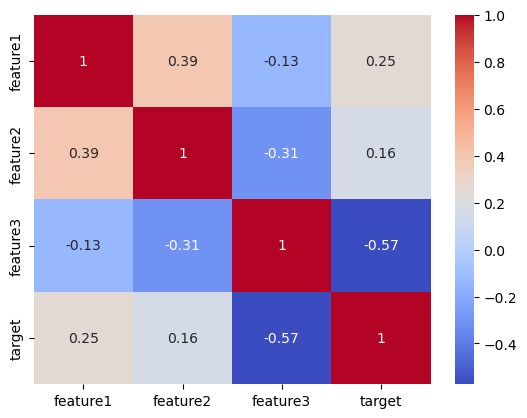

In [25]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

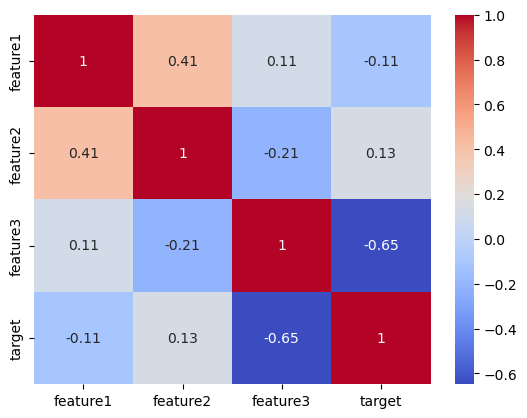

In [25]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  20 non-null     float64
 1   feature2  20 non-null     float64
 2   feature3  20 non-null     float64
 3   target    20 non-null     float64
dtypes: float64(4)
memory usage: 772.0 bytes


In [29]:
orig_df.describe()

,feature1,feature2,feature3,target
count,15.000000,15.000000,15.000000,15.000000
mean,0.409031,0.517677,0.402788,-0.107167
std,0.275039,0.232950,0.284142,0.087170
min,0.046809,0.219917,0.066089,-0.398926
25%,0.171001,0.320871,0.236298,-0.112995
50%,0.345523,0.439991,0.272433,-0.105965
75%,0.622800,0.684509,0.512518,-0.052383
max,0.965995,0.941360,0.990882,-0.034835


In [31]:
df.describe()

,feature1,feature2,feature3,target
count,20.000000,20.000000,20.000000,20.000000
mean,0.435187,0.506414,0.421266,-0.122641
std,0.294113,0.209542,0.291645,0.097712
min,0.046809,0.219917,0.066089,-0.398926
25%,0.171263,0.342291,0.241296,-0.118679
50%,0.397762,0.469995,0.270898,-0.111018
75%,0.650631,0.651052,0.591789,-0.080162
max,0.965995,0.941360,0.990882,-0.034835


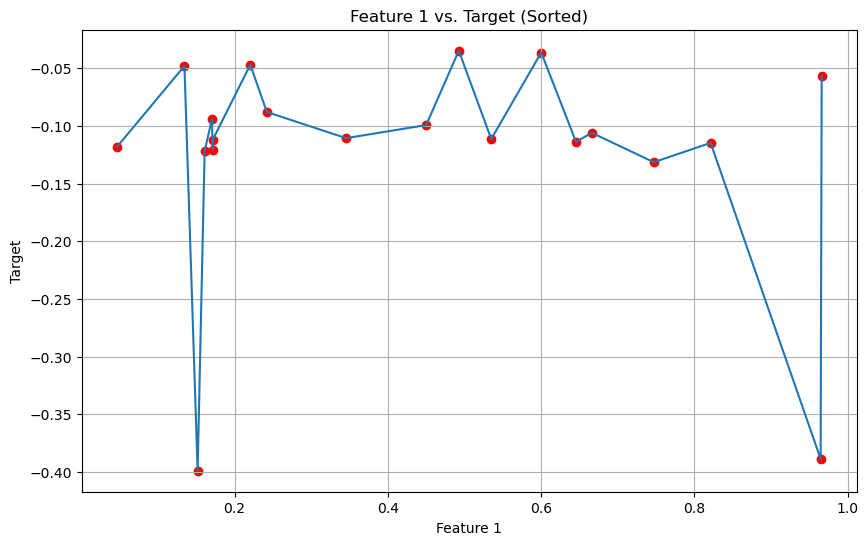

In [33]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

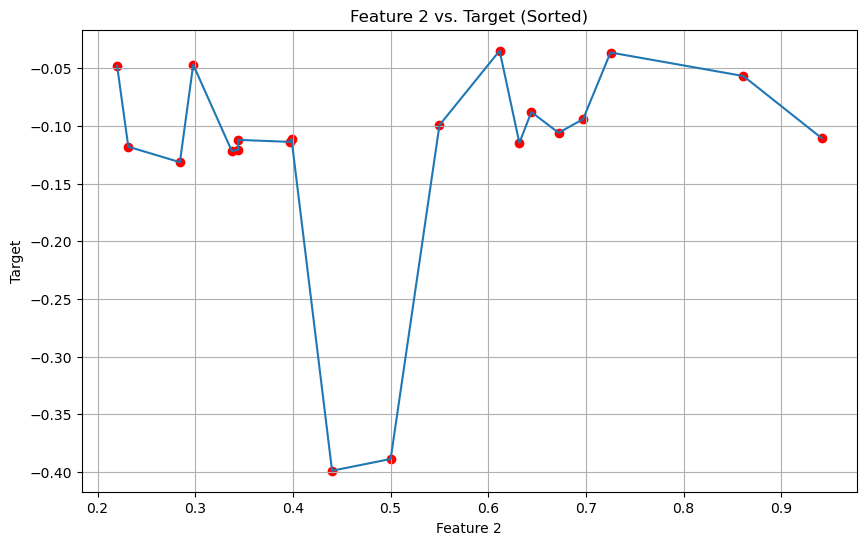

In [35]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

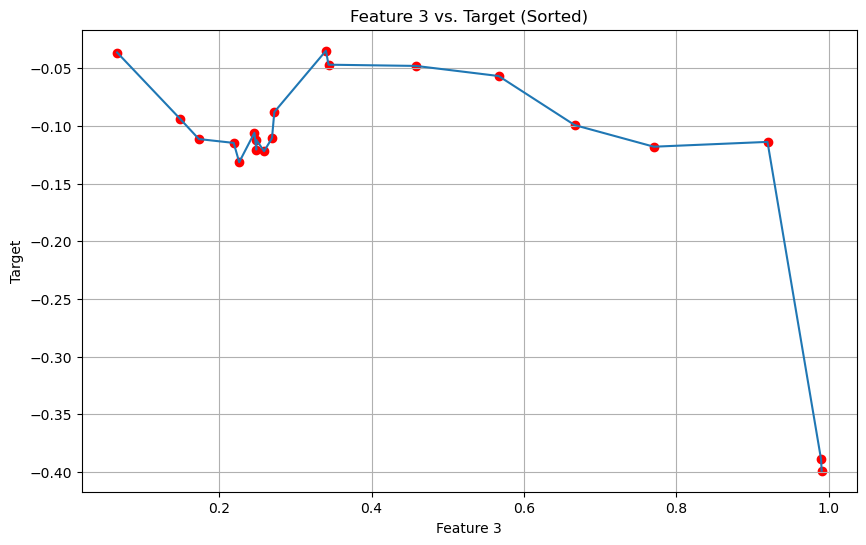

In [37]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [39]:
print('Running..........')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
#               C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
#               C(1.0, (1e-3, 1e3)) * RBF(10.0, (1e-2, 1e2))],
#    'alpha': [1e-10, 1e-5, 1e-2] # Regularization parameter
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}


# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Prepare the data
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)


# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Now you can use the best_gpr to make predictions
best_gpr

Running..........


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:

Best hyperparameters: {'alpha': 1e-10, 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 5, 'normalize_y': True}
Best score: -0.009755495364023517


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5, normalize_y=True)

In [41]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


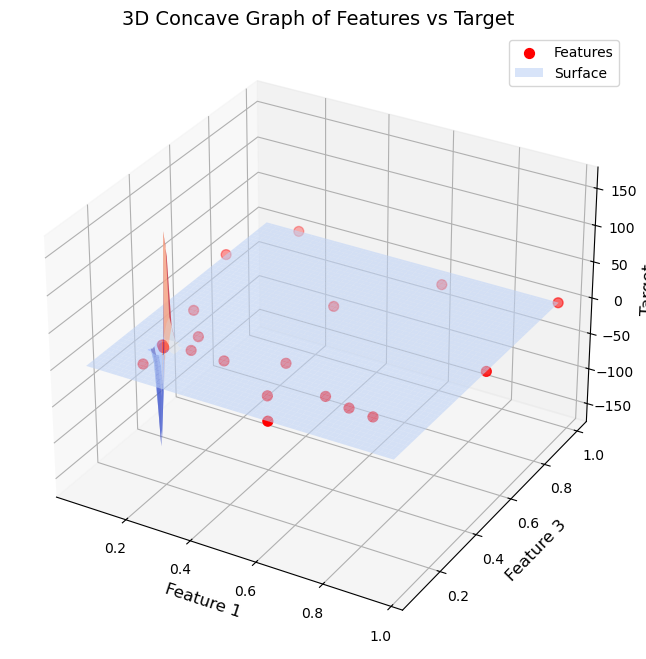

In [43]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature3'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature3'].min(), df['feature3'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature3']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 3', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

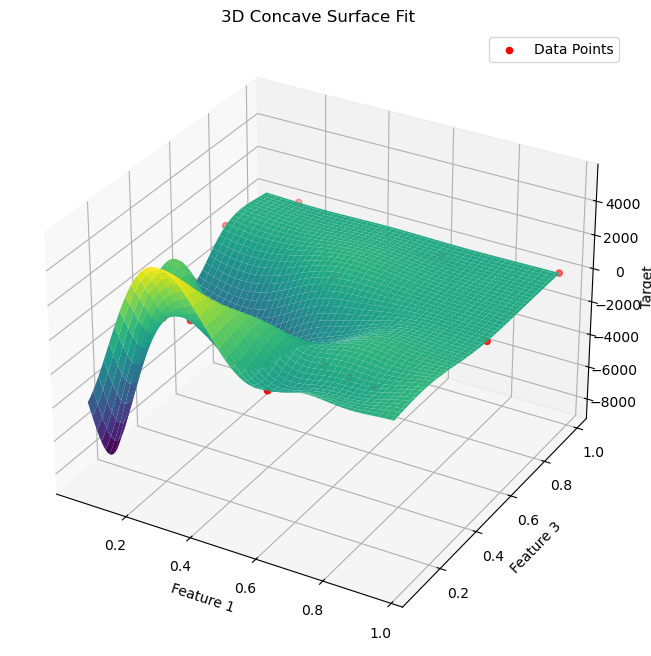

In [45]:
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.
#rbfi = Rbf(feature1, feature2, target, function='inverse')

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

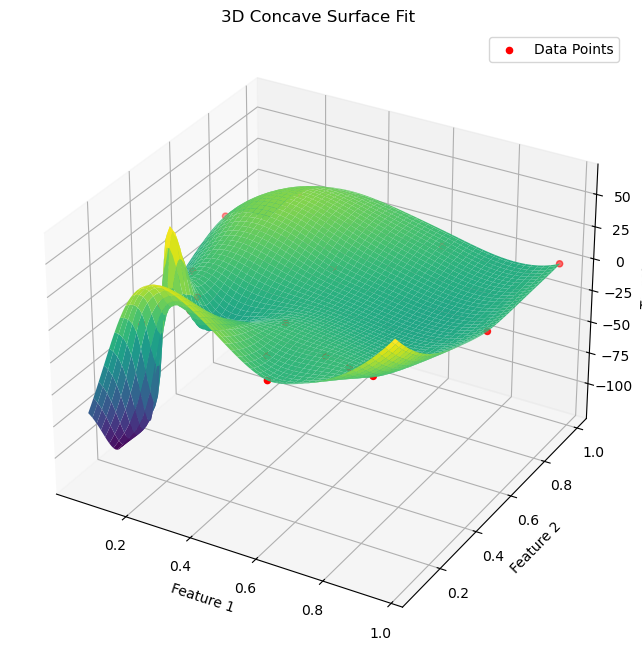

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import Rbf

# Surrogate model (RBF interpolation)
# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='thin_plate') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

In [49]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")

Feature 1 at peak of target: 0.49258141463713434
Feature 2 at peak of target: 0.6115931882759961
Feature 3 at peak of target: 0.3401763860035727


In [51]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")

Feature 1 at peak of target: 0.151836632374168
Feature 2 at peak of target: 0.43999061896644376
Feature 3 at peak of target: 0.990881866558951


In [53]:
feature1 = df['feature1']
feature2 = df['feature2']
feature3 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, feature3, target, function='multiquadric')

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
zi = np.linspace(feature2.min(), feature3.max(), 100)
xi, yi, zi = np.meshgrid(xi, yi, zi)

# Interpolate the target values on the grid
ti = rbfi(xi, yi, zi)

# Find the minimum target value and its corresponding feature values
min_index = np.argmin(ti)
min_target = ti.flatten()[min_index]
min_feature1 = xi.flatten()[min_index]
min_feature2 = yi.flatten()[min_index]
min_feature3 = zi.flatten()[min_index]

print(f"The dip of the target is at:")
print(f"feature1: {min_feature1}")
print(f"feature2: {min_feature2}")
print(f"feature3: {min_feature3}")
print(f"target: {min_target}")

The dip of the target is at:
feature1: 0.16751012840878068
feature2: 0.2199172404897456
feature3: 0.2199172404897456
target: -1309.9520711898804


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


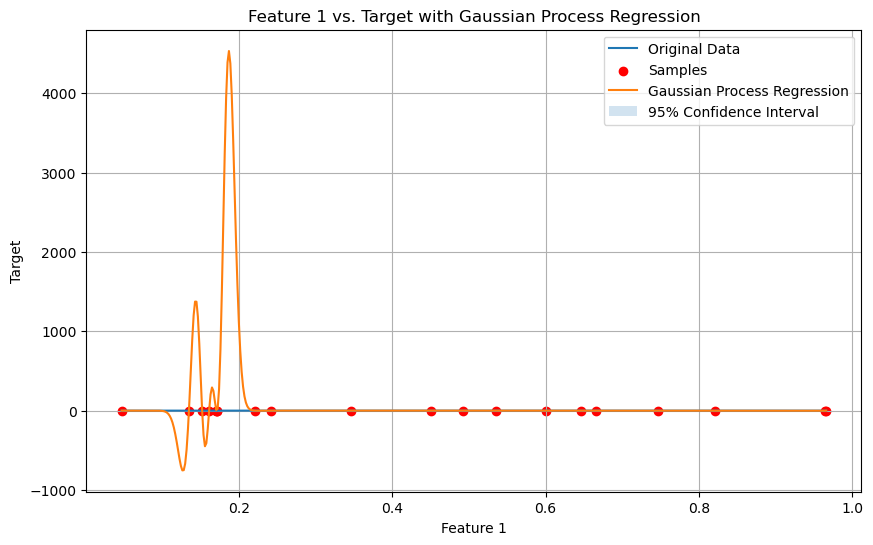

31.6**2 * RBF(length_scale=0.01)


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Improved Gaussian Process Regression for 'feature1'
df_sorted = df.sort_values('feature1')
X = df_sorted[['feature1']].values
y = df_sorted['target'].values

# Define a more complex kernel with optimized parameters
#kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)


plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


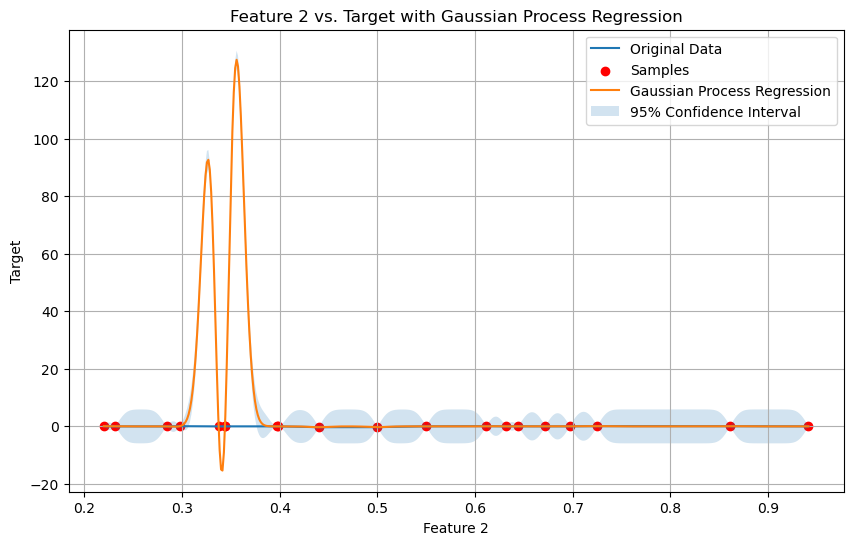

31.6**2 * RBF(length_scale=0.01)

In [57]:
# Improved Gaussian Process Regression for 'feature2' (similar improvements)
df_sorted = df.sort_values('feature2')
X = df_sorted[['feature2']].values
y = df_sorted['target'].values

#kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)


X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_

# Repeat the same process for 'feature3'

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


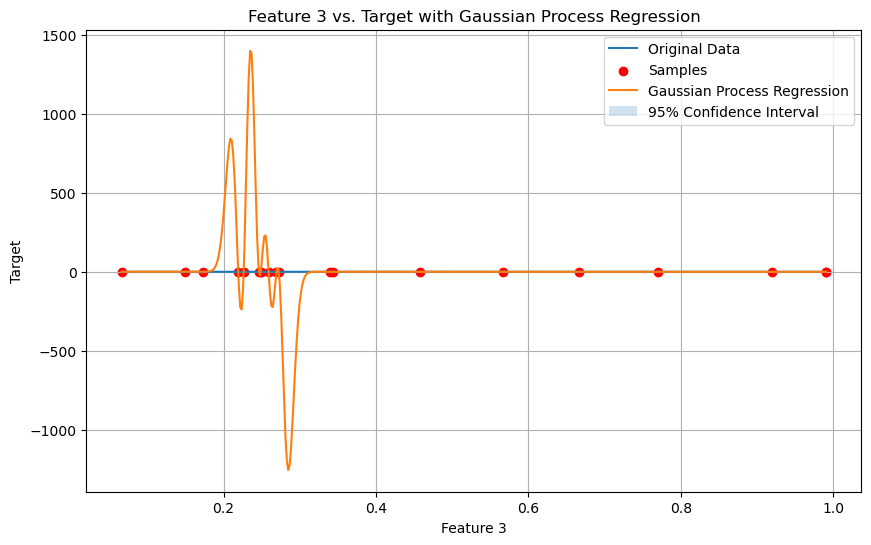

31.6**2 * RBF(length_scale=0.01)

In [59]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
# Improved Gaussian Process Regression for 'feature3'
df_sorted = df.sort_values('feature3')
X = df_sorted[['feature3']].values
y = df_sorted['target'].values

#kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
gpr.fit(X, y)

X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred, sigma = gpr.predict(X_pred, return_std=True)

plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_


In [61]:
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


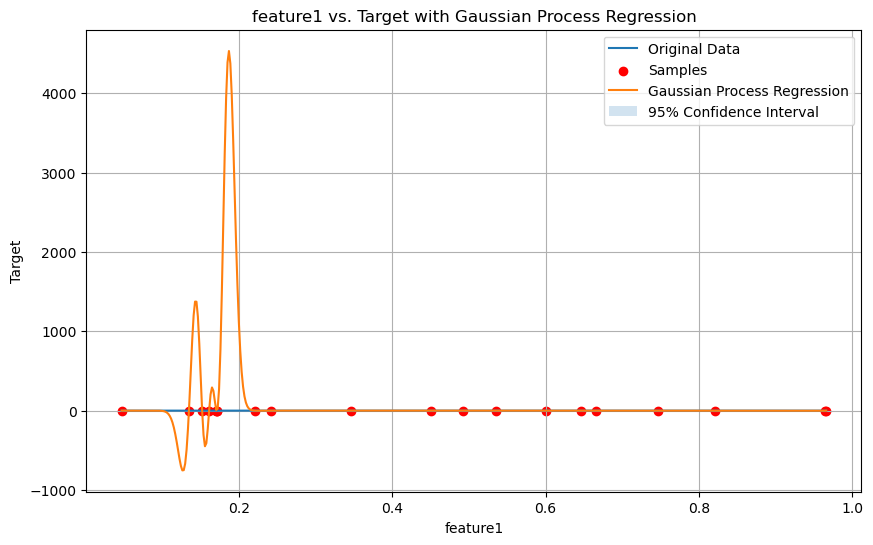

31.6**2 * RBF(length_scale=0.01)


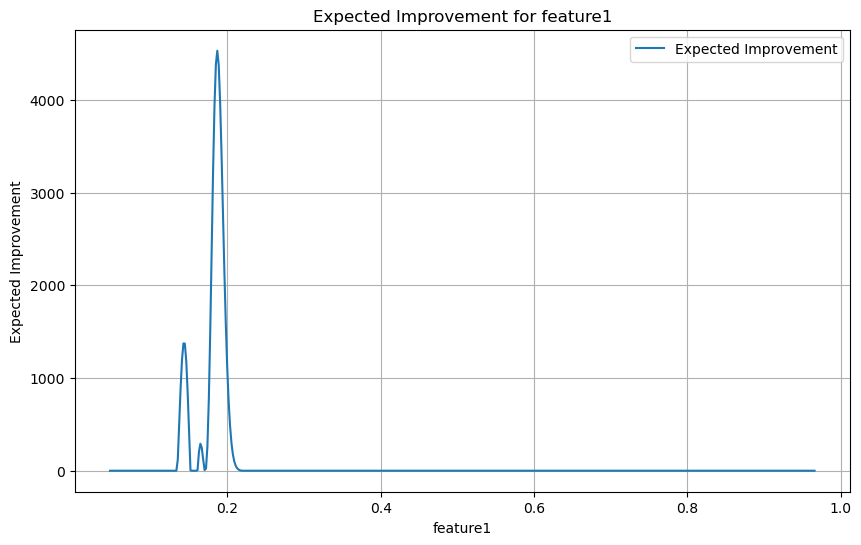

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


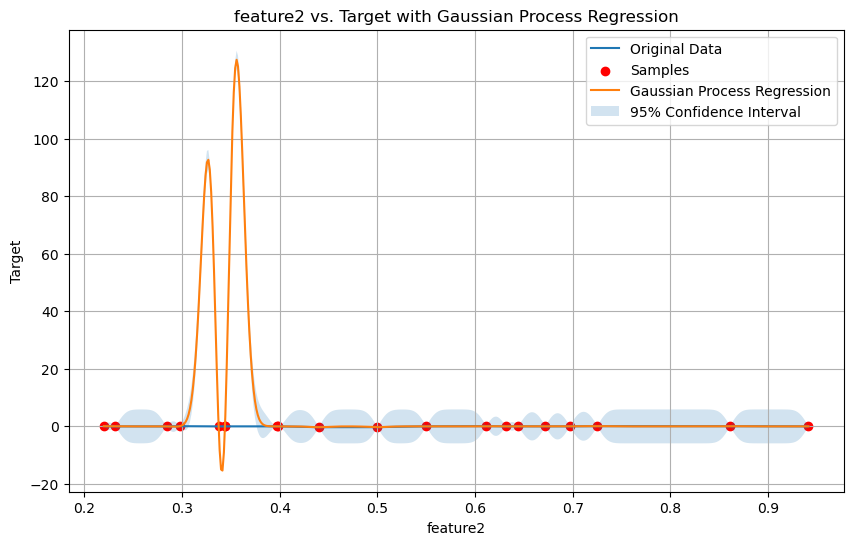

31.6**2 * RBF(length_scale=0.01)


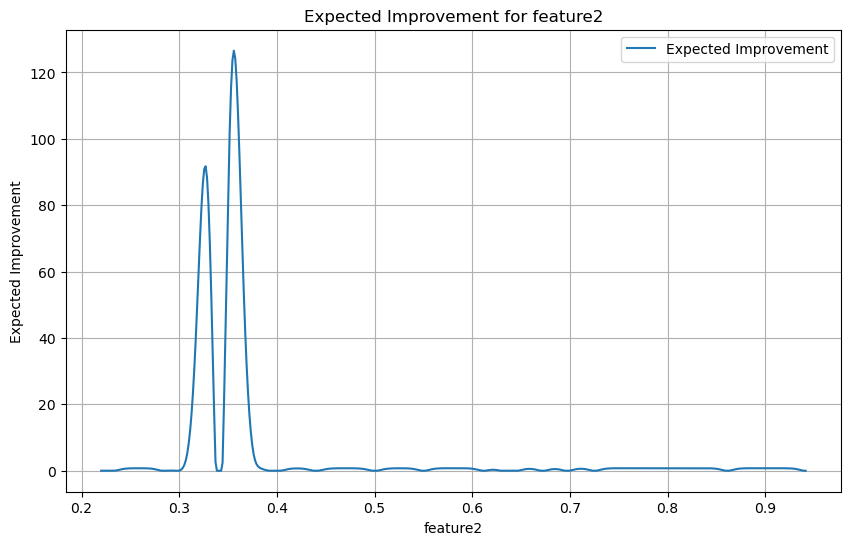

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


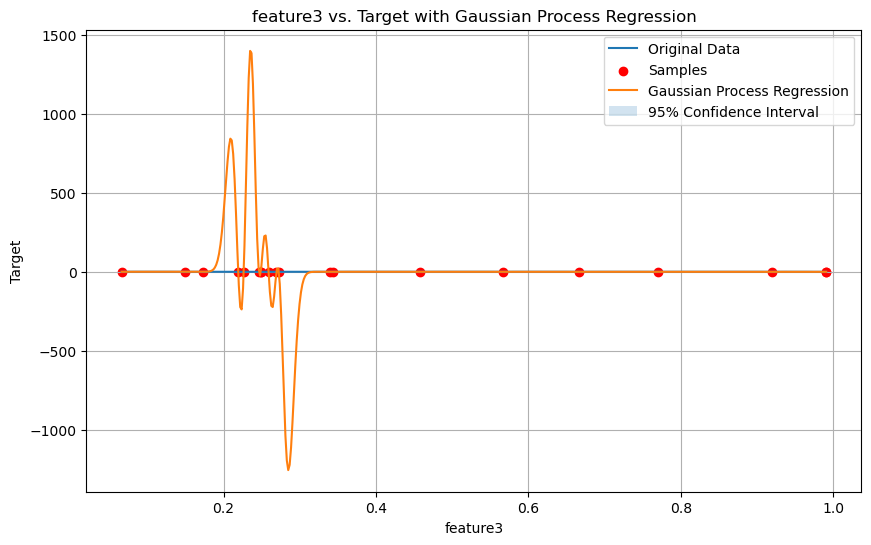

31.6**2 * RBF(length_scale=0.01)


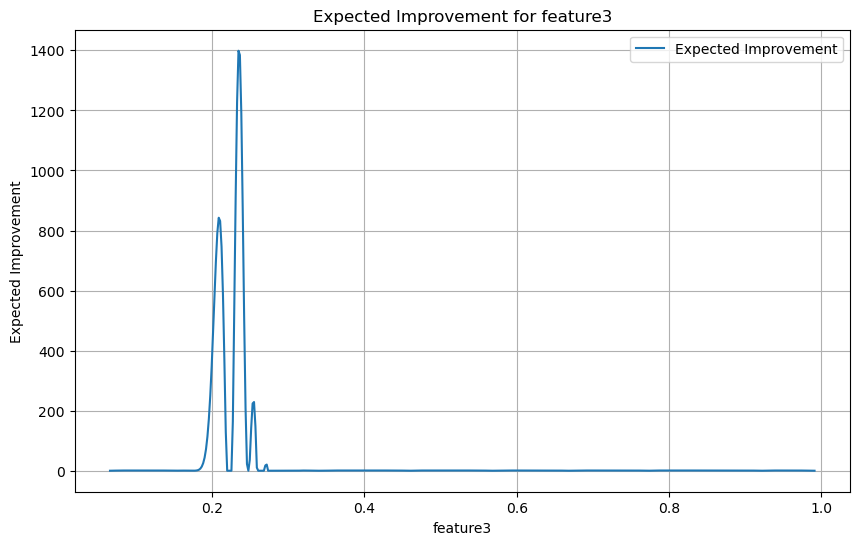

In [63]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from scipy.stats import norm

# Improved Gaussian Process Regression and Expected Improvement Calculation
for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data
    df_sorted = df.sort_values(feature_name)
    X = df_sorted[[feature_name]].values
    y = df_sorted['target'].values

    # Define a more complex kernel 
    #kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

    # Create and fit the GPR with optimized hyperparameters
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Predict and calculate confidence intervals
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Plot the GPR results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature_name], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature_name], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'{feature_name} vs. Target with Gaussian Process Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(gpr.kernel_)  # Print the optimized kernel

    # Calculate Expected Improvement
    ei = expected_improvement(X_pred, gpr)

    # Plot the Expected Improvement
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ei, label='Expected Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


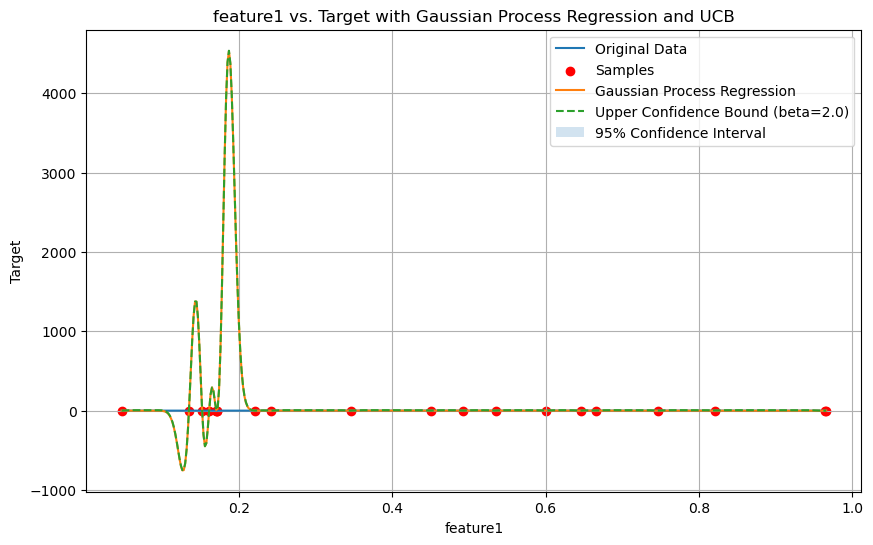

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


31.6**2 * RBF(length_scale=0.01)


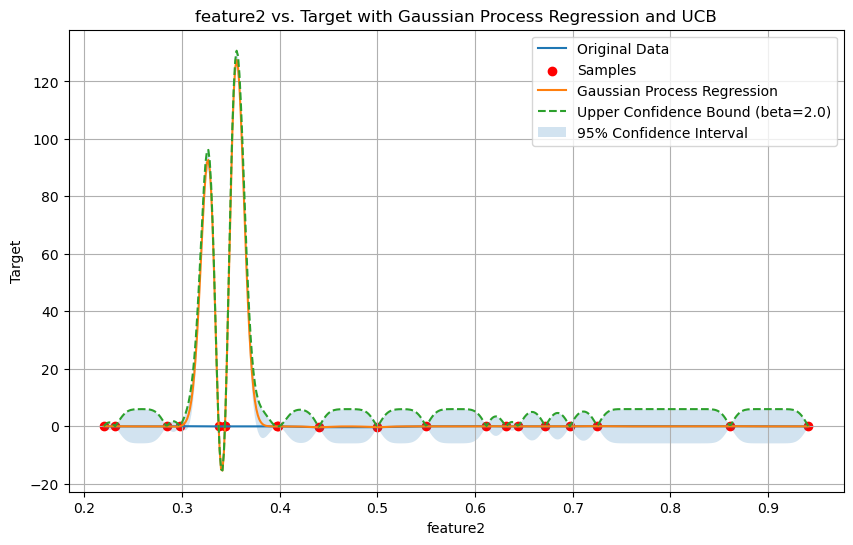

31.6**2 * RBF(length_scale=0.01)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


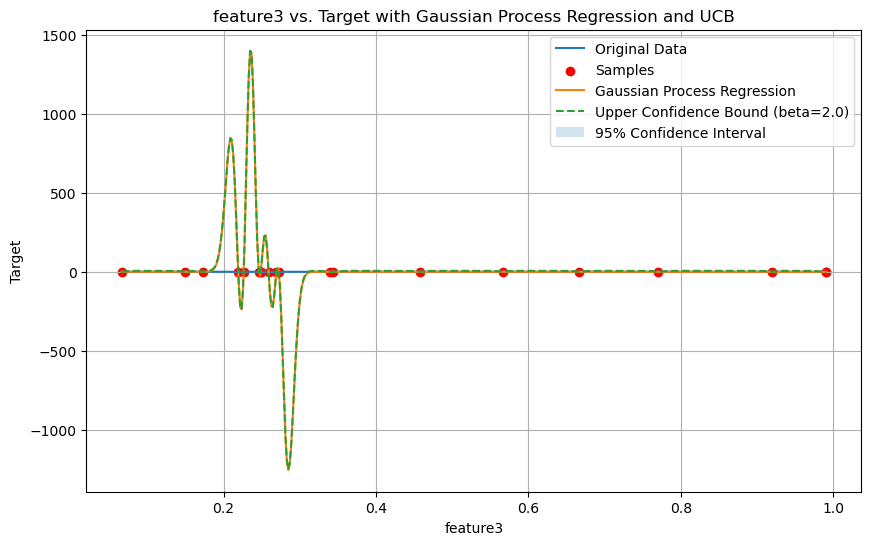

31.6**2 * RBF(length_scale=0.01)


In [65]:
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, WhiteKernel
from scipy.stats import norm

# Improved Gaussian Process Regression and UCB Calculation
for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data
    df_sorted = df.sort_values(feature_name)
    X = df_sorted[[feature_name]].values
    y = df_sorted['target'].values

    # Define a more complex kernel 
    #kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

    # Create and fit the GPR with optimized hyperparameters
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=30, normalize_y=True, random_state=0) # Increased restarts
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Predict and calculate confidence intervals
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate UCB with adjustable beta
    beta = 2.0  # You can adjust this value to control exploration vs. exploitation
    ucb = y_pred + beta * sigma


    # Plot the GPR results and UCB
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature_name], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature_name], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ucb, label=f'Upper Confidence Bound (beta={beta})', linestyle='--') #Plot UCB
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'{feature_name} vs. Target with Gaussian Process Regression and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(gpr.kernel_)  # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


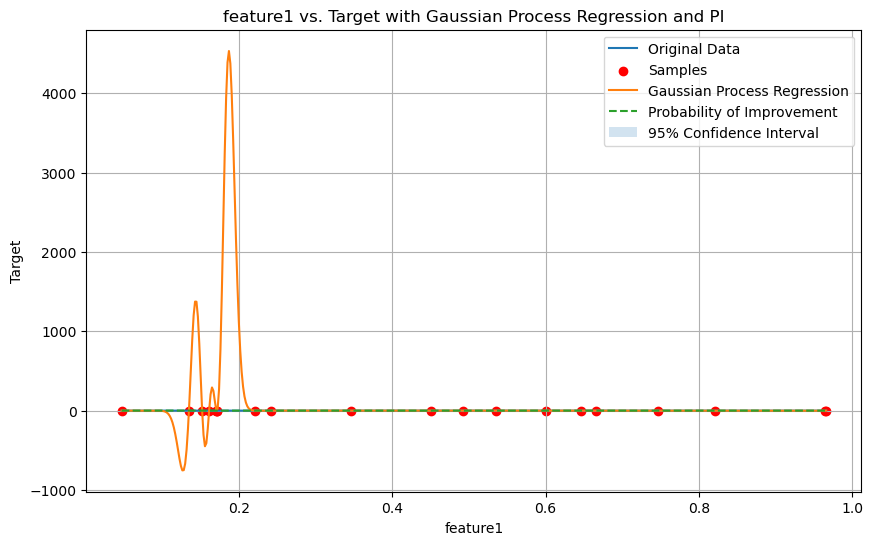

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


31.6**2 * RBF(length_scale=0.01)


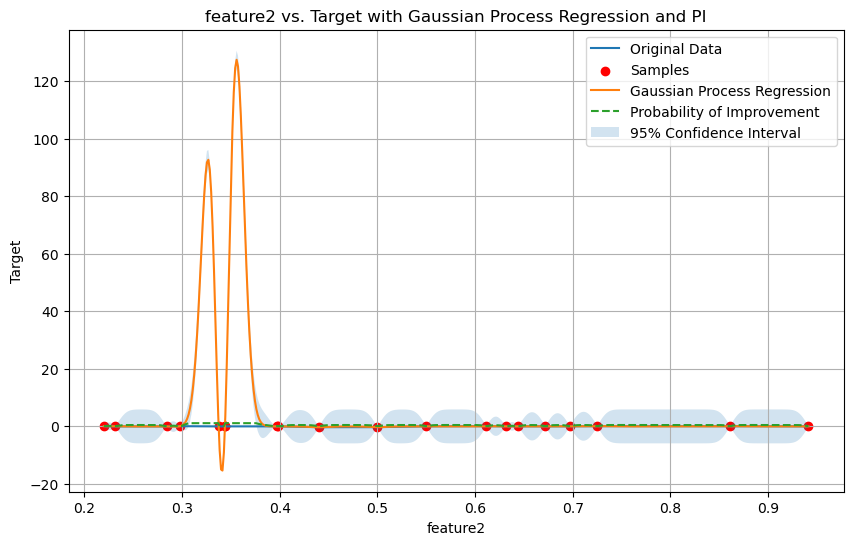

31.6**2 * RBF(length_scale=0.01)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


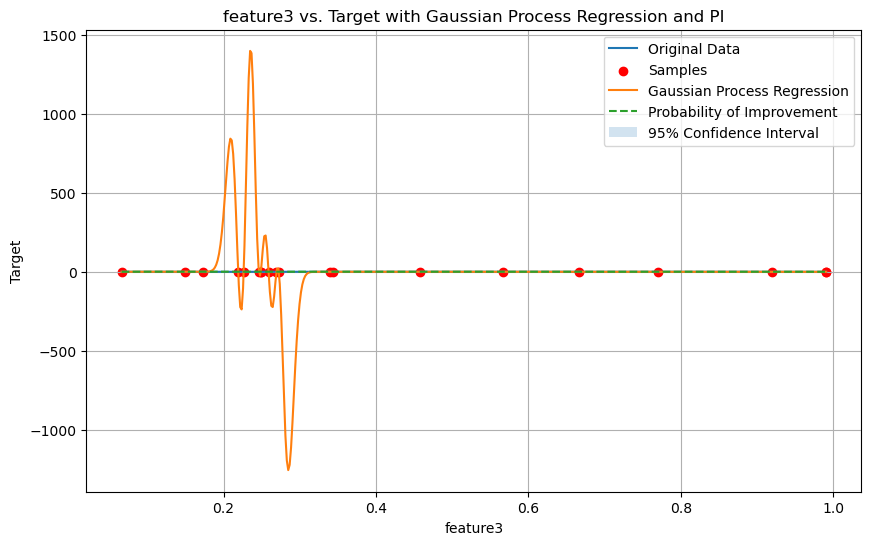

31.6**2 * RBF(length_scale=0.01)


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel
from scipy.stats import norm

# ... (Your existing code for data loading and preprocessing)

# Improved Gaussian Process Regression and Probability of Improvement Calculation
for feature_name in ['feature1', 'feature2', 'feature3']:
    # Prepare the data
    df_sorted = df.sort_values(feature_name)
    X = df_sorted[[feature_name]].values
    y = df_sorted['target'].values

    # Define a more complex kernel with optimized parameters (adjust as needed)
    #kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

    # Create and fit the GPR with optimized hyperparameters (increased restarts and normalize_y)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=30, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction with finer granularity
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

    # Predict and calculate confidence intervals
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (adjust xi as needed)
    def probability_of_improvement(X, gpr, xi=0.01):
        mu, sigma = gpr.predict(X, return_std=True)
        mu_sample_opt = np.max(gpr.y_train_)
        with np.errstate(divide='ignore'):
            Z = (mu - mu_sample_opt - xi) / sigma
            pi = norm.cdf(Z)
            pi[sigma == 0.0] = 0.0  # Handle cases with zero sigma
        return pi

    pi = probability_of_improvement(X_pred, gpr)


    # Plot the GPR results and Probability of Improvement
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature_name], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature_name], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement', linestyle='--')  # Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature_name)
    plt.ylabel('Target')
    plt.title(f'{feature_name} vs. Target with Gaussian Process Regression and PI')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(gpr.kernel_)  # Print the optimized kernel

In [69]:
import numpy as np
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, WhiteKernel

# Assuming 'inputs', 'outputs', 'df', 'gpr' are defined as in your previous code
X = df[['feature1', 'feature2', 'feature3']]
y = df[['target']]


# Define the acquisition function (e.g., Expected Improvement)
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Generate a single new input data point based on the acquisition function

# 1.  Use existing input data for the grid
grid_points = inputs

# 2. Re-train the GPR model (you might want to keep the existing model)
# Create and fit the GPR model with both features
#kernel = RBF()  
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X, y)  # Fit using 'inputs' which has both features

# 3. Evaluate the acquisition function at each grid point
ei_values = expected_improvement(grid_points, gpr)

# 4. Find the point with the highest acquisition function value
best_index = np.argmax(ei_values)
new_input_data = grid_points[best_index]

print("New Input Data:", new_input_data)

New Input Data: [0.17152521 0.34391687 0.2487372 ]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [71]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=3)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.17558407 0.34852749 0.25277661]


In [73]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.175584, 0.348527, 0.252777]


In [75]:
inputs

array([[0.17558407, 0.34852749, 0.25277661],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ],
       [0.160962  , 0.337418  , 0.258974  ],
       [0.45      , 0.55      , 0.66667   ],
       [0.964659  , 0.5       , 0.99      ],
       [0.171525  , 0.343916  , 0.248737  ]])

In [77]:
# Add the new data points
next_inputs = np.vstack([inputs, new_input_data])

len(next_inputs), len(inputs)

(21, 20)

In [79]:
next_inputs

array([[0.17558407, 0.34852749, 0.25277661],
       [0.24211446, 0.64407427, 0.27243281],
       [0.53490572, 0.39850092, 0.17338873],
       [0.49258141, 0.61159319, 0.34017639],
       [0.13462167, 0.21991724, 0.45820622],
       [0.34552327, 0.94135983, 0.26936348],
       [0.15183663, 0.43999062, 0.99088187],
       [0.64550284, 0.39714294, 0.91977134],
       [0.74691195, 0.28419631, 0.22629985],
       [0.17047699, 0.6970324 , 0.14916943],
       [0.22054934, 0.29782524, 0.34355534],
       [0.66601366, 0.67198515, 0.2462953 ],
       [0.04680895, 0.23136024, 0.77061759],
       [0.60009728, 0.72513573, 0.06608864],
       [0.96599485, 0.86111969, 0.56682913],
       [0.821135  , 0.631793  , 0.21912   ],
       [0.160962  , 0.337418  , 0.258974  ],
       [0.45      , 0.55      , 0.66667   ],
       [0.964659  , 0.5       , 0.99      ],
       [0.171525  , 0.343916  , 0.248737  ],
       [0.17558407, 0.34852749, 0.25277661]])

In [81]:
next_data = {'feature1': next_inputs[:,0],
             'feature2': next_inputs[:,1],
             'feature3': next_inputs[:,2],
       }

next_df = pd.DataFrame(next_data)
next_df

,feature1,feature2,feature3
0,0.175584,0.348527,0.252777
1,0.242114,0.644074,0.272433
2,0.534906,0.398501,0.173389
3,0.492581,0.611593,0.340176
4,0.134622,0.219917,0.458206
5,0.345523,0.941360,0.269363
6,0.151837,0.439991,0.990882
7,0.645503,0.397143,0.919771
8,0.746912,0.284196,0.226300
9,0.170477,0.697032,0.149169


In [83]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.175584, 0.348527, 0.252777]
